first install the yellowbrick

In [3]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


Importing the important libraries

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from yellowbrick.regressor import ResidualsPlot

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 7)

In [65]:
file_path = 'Advertising.csv'
df = pd.read_csv(file_path)

In [66]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [67]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [10]:
df.shape

(200, 4)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [69]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


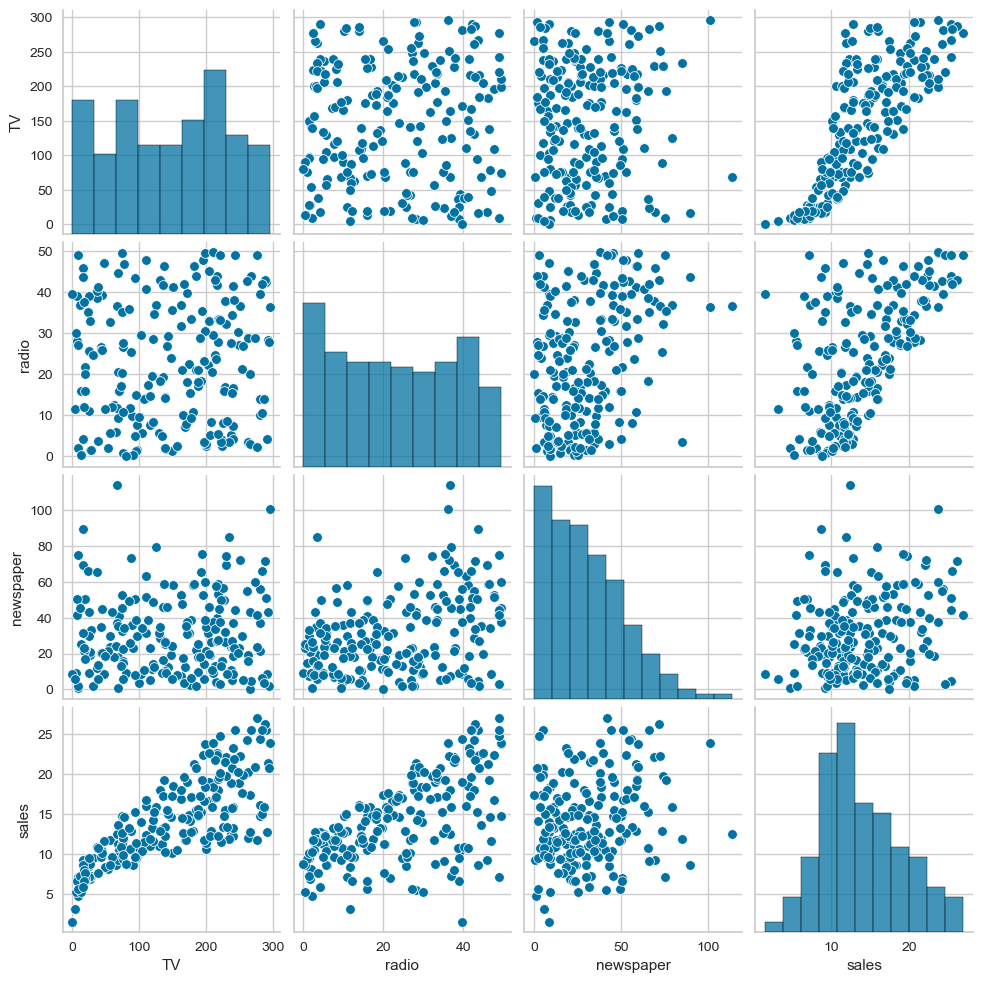

In [13]:
sns.pairplot(df)
plt.show()

In [14]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


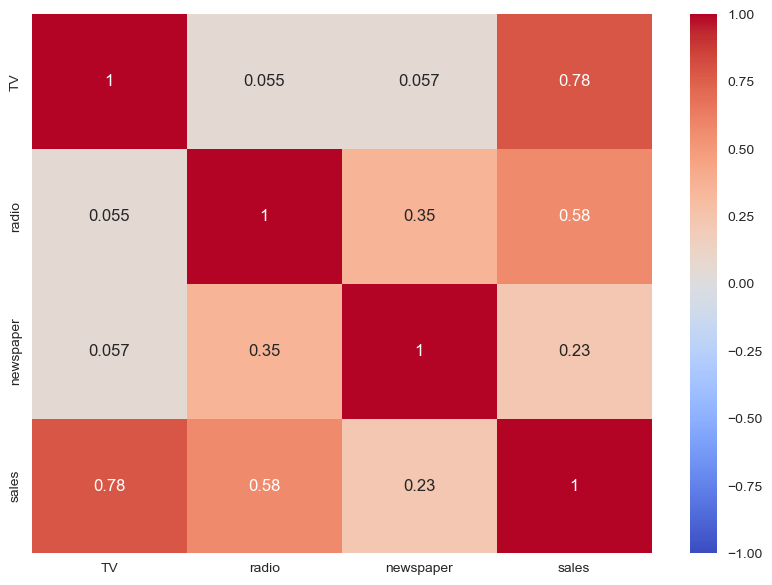

In [70]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [17]:
X = df.drop('sales', axis=1)
y = df['sales']

In [18]:
X.shape

(200, 3)

In [19]:
y.shape

(200,)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
df.sample(15)

,TV,radio,newspaper,sales
155,4.1,11.6,5.7,3.2
192,17.2,4.1,31.6,5.9
107,90.4,0.3,23.2,8.7
142,220.5,33.2,37.9,20.1
116,139.2,14.3,25.6,12.2
186,139.5,2.1,26.6,10.3
10,66.1,5.8,24.2,8.6
176,248.4,30.2,20.3,20.2
166,17.9,37.6,21.6,8.0
28,248.8,27.1,22.9,18.9


In [74]:
print('Train features shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test features shape: ', X_test.shape)
print('Test target shape: ', y_test.shape)

Train features shape:  (160, 3)
Train target shape:  (160,)
Test features shape:  (40, 3)
Test target shape:  (40,)


In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
model = LinearRegression()

In [77]:
model.fit(X_train, y_train)

LinearRegression()

In [78]:
y_pred = model.predict(X_test)

In [79]:
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [80]:
X_train.head()

,TV,radio,newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


In [81]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [82]:
model.intercept_

2.979067338122631

In [83]:
X_test.loc[[95]]

,TV,radio,newspaper
95,163.3,31.6,52.9


In [84]:
y_test.loc[95]

16.9

In [85]:
model.predict(X_test.loc[[95]])

array([16.4080242])

In [86]:
#Here we are comparing the values of the actual value before predicting from the model and the value that the model predict
my_dict = {'Actual': y_test, 'Pred': y_pred, 'Residual': y_test - y_pred, 'LSE': (y_test - y_pred)**2, 'ABS': abs(y_test - y_pred)}

In [87]:
compare = pd.DataFrame(my_dict)

In [88]:
compare.head()

,Actual,Pred,Residual,LSE,ABS
95,16.9,16.408024,0.491976,0.242040,0.491976
15,22.4,20.889882,1.510118,2.280456,1.510118
30,21.4,21.553843,-0.153843,0.023668,0.153843
158,7.3,10.608503,-3.308503,10.946189,3.308503
128,24.7,22.112373,2.587627,6.695812,2.587627


In [89]:
#What I am doing here is that, i just want to take the actual, pred and residual values. So, I put : for the row value 
#because i want all the rows, then i just want the first three values, so What i did is that i wrote (:3) for the columns
#values to take only them
filtering = compare.iloc[:, :3]
filtering

,Actual,Pred,Residual
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,-0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,-2.106346
45,14.9,15.155070,-0.255070


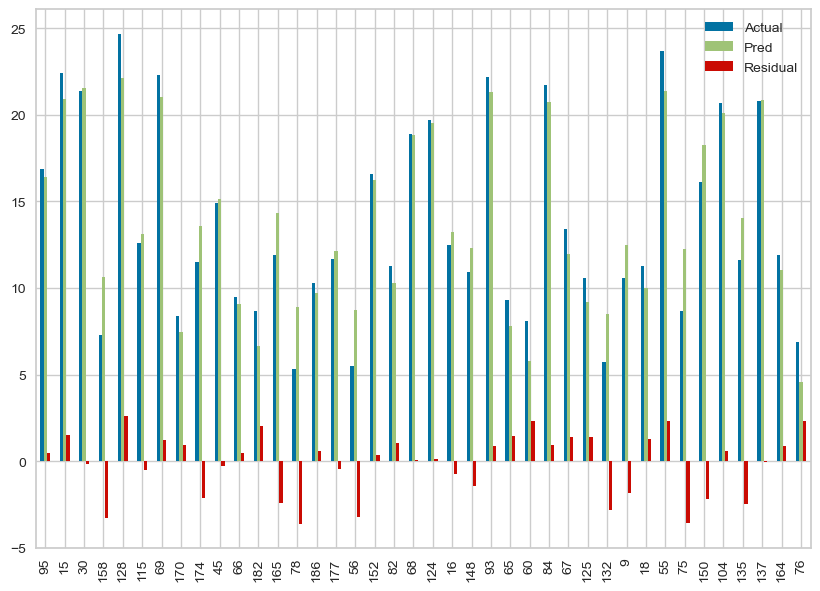

In [46]:
filtering.plot(kind='bar')
#filtering.plot(kind='bar', figsize=(15, 9)) 
#I can put the second one if i want to make the graph much bigger to see much clearer
plt.show()

Now we want to see the errr in our model by the error metrics

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [106]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [92]:
def metrics_cal(a, p):
    R2_score = r2_score(a, p)
    mae = mean_absolute_error(a, p)
    mse = mean_squared_error(a, p)
    rmse = np.sqrt(mean_squared_error(a, p))
    
    print('The R2 score is: ', R2_score)
    print('The mean absolute error is: ', mae)
    print('The mean squared error is: ', mse)
    print('The root mean squared error is: ', rmse)
    
    return None

In [93]:
metrics_cal(y_test, y_pred)

The R2 score is:  0.8994380241009121
The mean absolute error is:  1.4607567168117597
The mean squared error is:  3.1740973539761015
The root mean squared error is:  1.7815996615334495


In [102]:
sales_mean = df['sales'].mean()
sales_mean

14.0225

In [107]:
mae / sales_mean

0.10417234564533853

In [108]:
mse / sales_mean

0.226357450809492

In [109]:
rmse / sales_mean

0.12705292647769295

16.9

array([16.4080242])